# The world of developers 

## Section 1: Business Understanding 

Stackoverflow’s 2017 Annual Developer Survey aims to understand various aspects of jobs that relate to data analysis and software development. It has around 64,000 records spread over about 213 countries and regions. 

Based on the survey, we want to predict job satisfaction through a sample, in addition to answering the following business questions:

#### Question 1:  How is job satisfaction related to earned salary and hours worked per week for professional developers?

#### Question 2: On average, how much do professional developers earn and what size of company do they work most? 

#### Question 3: On average, how is job satisfaction and salary according to the importance of each person’s education? 

#### Question 4: How is the job satisfaction ratio for professional developers who can work at home? 

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

## Section 2: Data Understanding 

### Import Data - Stack Overflow Data - 2017 Survey 

In [5]:
df = pd.read_csv('C://Users//Juan Manuel Niño S//Desktop//survey_results_public.csv') 
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## To know the number of records that the base has 

df.shape[0]

51392

Base for modeling

In [7]:
df = df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction', 'Salary', 
               'ExpectedSalary', 'Professional', 'University', 'FormalEducation', 'EmploymentStatus', 'DiversityImportant',
               'HomeRemote', 'EducationImportant', 'CompanySize']]


In [8]:
# Describe numerical variables

df.describe()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


array([[<AxesSubplot:title={'center':'CareerSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'HoursPerWeek'}>,
        <AxesSubplot:title={'center':'StackOverflowSatisfaction'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'ExpectedSalary'}>]], dtype=object)

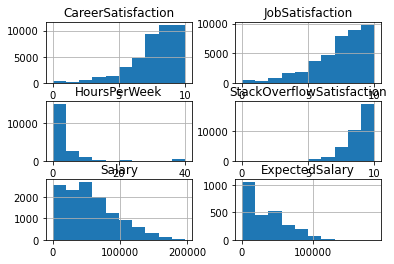

In [9]:
## Histogram to analize numerical variables

df.hist()

## Section 3: Prepare Data 

In [10]:
# Missing values of the target variable are cleared because null variables cannot be predicted

df = df.dropna(axis = 0, subset = ['JobSatisfaction'])
df.shape[0]

40376

In [11]:
# Fill numeric columns with the mean, to ensure consistency of the data and that model works well. Data with missing values
# can't be processing by machine learning algorithns, so is necessary to replace missing values by a approximation. In this
# case I used the mean because is the best approximation.

def add_mean(df):
        

    ''' 
    INPUT:
    df - Sample of the survey data

    OUTPUT:
    df - Sample survey data with mean instead of missing values

    '''

    vn = df.select_dtypes(include = ['float', 'int']).columns

    for i in vn:
        df[i].fillna((df[i].mean()), inplace = True)
        
    return df
    


In [12]:
# The function add_mean repalce missing values by mean

df = add_mean(df)

In [13]:
# Dummy the categorical variables, so that categorical variables can be consumed by the model
# Matrix with categorical variables can't be processed by certain algorithns as lineal regression, so is necessary to encode
# the categorical variables to dummies

def dummies(df):

    ''' 
    INPUT:
    df - Sample of the survey data
    
    OUTPUT:
    df - Sample survey data with with dymmies of categorical variables instead of categorical variables

    '''

    vc = df.select_dtypes(include = ['object']).copy().columns

    for ct in vc:
        df = pd.concat([df.drop(ct, axis = 1), pd.get_dummies(df[ct], prefix = ct, prefix_sep = '_', drop_first = True)], axis = 1)

    return df


In [14]:
# The function dummies replace categorical vairbles to dummies for each of them

df = dummies(df)

## Section 4: Modeling

In [20]:
# Split into explanatory and response variables

def split_data(df):
    
    ''' 
    INPUT:
    df - Sample of the survey data
    
    OUTPUT:
    X - Explanatory variables
    Y - Target Variable

    '''

    Y = df['JobSatisfaction']

    X = df.drop(['JobSatisfaction'], axis = 1)

    return X, Y

In [21]:
# Function split_data split the data in explanatory and target variable

X, Y = split_data(df)

In [16]:
# Split into train and test - Fit model

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 48)

mco_model = LinearRegression(normalize=True)
mco_model.fit(X_Train, Y_Train)


LinearRegression(normalize=True)

## Section 5: Evaluation 

In [17]:
# Score using the model

pred_test = mco_model.predict(X_Test)
r2 = r2_score(Y_Test, pred_test)
r2

0.41418475218014816

In [18]:
# Is overfitting generated?

pred_train = mco_model.predict(X_Train)

test_sc = r2_score(Y_Test, pred_test)
train_sc = r2_score(Y_Train, pred_train)
train_sc

0.42743106610327297

Overfitting is not generated because the metrics evaluated in train and test give similar.

## Section 6: Evaluate the Results

### 1. How does job satisfaction relate to earned salary and hours worked per week for professional developers?

In [9]:
## A correlation matrix is done

df[df['Professional'] == 'Professional developer'][['JobSatisfaction', 'Salary', 'HoursPerWeek']].corr()

,JobSatisfaction,Salary,HoursPerWeek
JobSatisfaction,1.000000,0.120765,-0.076535
Salary,0.120765,1.000000,-0.120114
HoursPerWeek,-0.076535,-0.120114,1.000000


<AxesSubplot:>

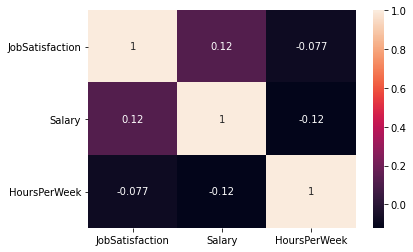

In [10]:
# A Heat Map is done to analize the correlation between interest variables

sns.heatmap(df[df['Professional'] == 'Professional developer'][['JobSatisfaction', 'Salary', 'HoursPerWeek']].corr(),
            annot = True)

According to the previous results for the year 2017, the job satisfaction of professional developers would have a positive relationship with salary, which means that with a salary increase there would eventually be greater job satisfaction. However, as expected in the face of an increase in working hours, job satisfaction would tend to decrease, this means that they have a negative correlation.

### 2. On average, how much do professional developers earn and what size of company do they work most?

In [11]:
# Only preffesional developer

PD = pd.DataFrame(df[df['Professional'] == 'Professional developer'][['Professional','Salary', 'CompanySize']])
PD = PD.dropna(axis = 0, subset = ['Salary'], how = 'all')
PD['Salary'].mean()

56298.48064062976

Text(0.5, 1.0, 'Wage Distribution')

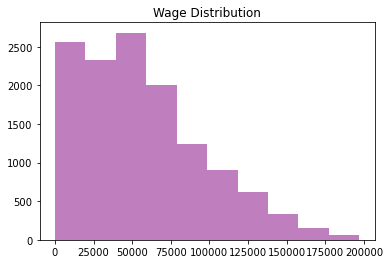

In [12]:
# Histogram is done to analize the wage distribution

plt.hist(PD['Salary'], color = 'purple', alpha = 0.5)
plt.title('Wage Distribution')

<AxesSubplot:title={'center':'Proportion of proffesional developer workers by size company'}>

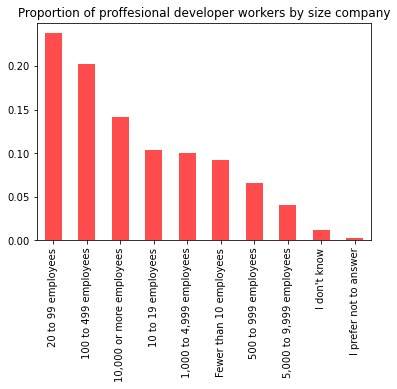

In [13]:
# Proportion of proffesional developer workers by size company

((PD['CompanySize'].value_counts())/PD.shape[0]).plot(kind='bar', color= 'red', 
                                                      title='Proportion of proffesional developer workers by size company',
                                                      alpha = 0.7)

Professional developers have an average salary of 56,298, and around 43% are employed in companies with fewer than 500 employees.

### 3. On average, how is job satisfaction and salary according to the importance of each person's education?

In [15]:
# Filter Data Frame

IE = pd.DataFrame(df[['JobSatisfaction', 'EducationImportant', 'Salary']])

In [16]:
# Comparison in a table

A = IE.groupby(['EducationImportant']).mean()['JobSatisfaction'].reset_index()
B = IE.groupby(['EducationImportant']).mean()['Salary'].reset_index()
C = A.merge(B, how = 'left', left_on = 'EducationImportant', right_on = 'EducationImportant')
C

,EducationImportant,JobSatisfaction,Salary
0,Important,7.057989,55949.466853
1,Not at all important,7.003062,58676.103645
2,Not very important,6.971906,55498.730833
3,Somewhat important,6.932311,55751.705967
4,Very important,7.213850,59541.444482


On average, people who place the highest importance on education have a higher salary and greater job satisfaction than people who place less importance on education. 

### 4. How is the job satisfaction ratio for professional developers who can work at home?

In [18]:
# New filter data frame

HO = df[df['Professional'] == 'Professional developer'][['JobSatisfaction', 'HomeRemote']]

<AxesSubplot:title={'center':'Job satisfaction by type of job'}, xlabel='HomeRemote'>

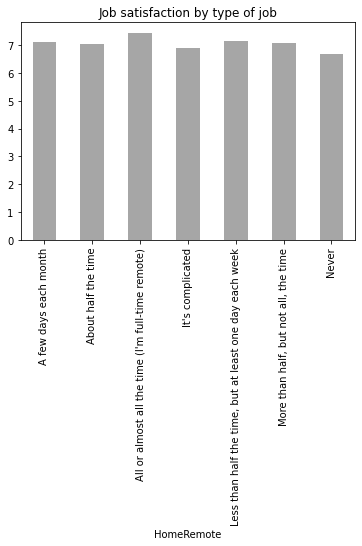

In [19]:
HO.groupby(['HomeRemote']).mean()['JobSatisfaction'].plot(kind='bar', color= 'grey', 
                                                      title='Job satisfaction by type of job',
                                                      alpha = 0.7)

According to the previous graph, for professional developers there is greater job satisfaction if they always or almost always work remotely at home.